In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:

Iris = load_iris()

In [3]:
X = Iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = Iris.target  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

# Print the feature names and target names
print("Feature names:", Iris.feature_names)
print("Target names:", Iris.target_names)

# Print the first few samples in the dataset
print("First 5 samples:")
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {Iris.target_names[y[i]]})")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)


In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

In [7]:
X_2d = X[:, :2]  # Select only sepal length and sepal width
svm = SVC(kernel="linear", C=1)
svm.fit(X_2d, y)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


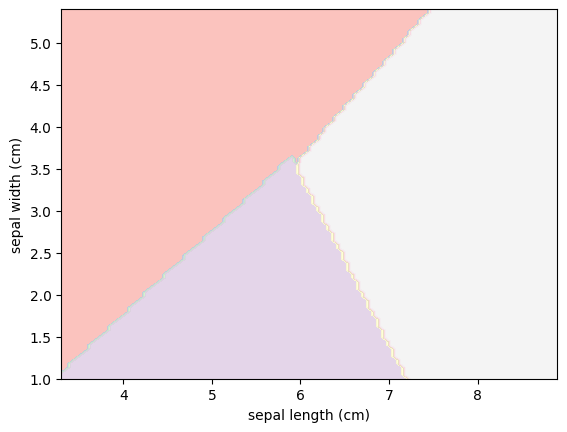

In [8]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_2d,
    response_method="predict",
    alpha=0.8,
    cmap="Pastel1",
    xlabel=Iris.feature_names[0],
    ylabel=Iris.feature_names[1],
)

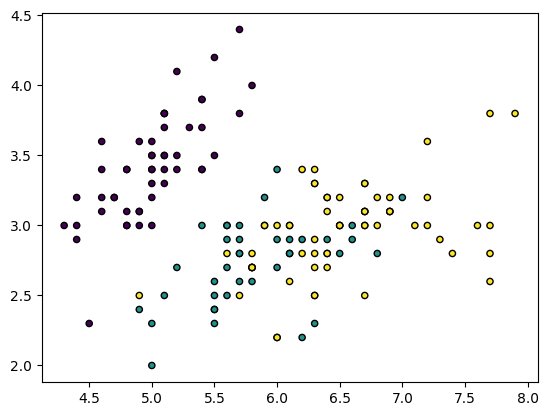

In [9]:
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

In [10]:
# New cell: Import evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# New cell: Split data and retrain model
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)  # 70% train, 30% test
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# New cell: Make predictions and evaluate
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=Iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ...existing code...

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45


Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]


In [ ]:
# New cell: Save the trained model
import joblib
joblib.dump(svm, '../models/svm_model.pkl')

['../models/svm_model.pkl']

In [12]:
import pickle
with open('../models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)